In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore

In [97]:
data = pd.read_csv('admission.csv')

In [194]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0


In [195]:
data.shape

(500, 9)

In [196]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 33.3 KB


In [198]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.284000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.451388
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [199]:
numeric = data.iloc[:,1:7]

In [200]:
numeric=numeric.drop(['University Rating','SOP','LOR ' ],axis=1)

In [201]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# treating outliers

In [202]:
a= data.columns
a

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [203]:
for i in a:
    print(i)
    print(np.abs(zscore(data[i])),end='\n')

Serial No.
[1.72859016 1.72166195 1.71473373 1.70780551 1.70087729 1.69394908
 1.68702086 1.68009264 1.67316443 1.66623621 1.65930799 1.65237978
 1.64545156 1.63852334 1.63159512 1.62466691 1.61773869 1.61081047
 1.60388226 1.59695404 1.59002582 1.5830976  1.57616939 1.56924117
 1.56231295 1.55538474 1.54845652 1.5415283  1.53460008 1.52767187
 1.52074365 1.51381543 1.50688722 1.499959   1.49303078 1.48610257
 1.47917435 1.47224613 1.46531791 1.4583897  1.45146148 1.44453326
 1.43760505 1.43067683 1.42374861 1.41682039 1.40989218 1.40296396
 1.39603574 1.38910753 1.38217931 1.37525109 1.36832287 1.36139466
 1.35446644 1.34753822 1.34061001 1.33368179 1.32675357 1.31982536
 1.31289714 1.30596892 1.2990407  1.29211249 1.28518427 1.27825605
 1.27132784 1.26439962 1.2574714  1.25054318 1.24361497 1.23668675
 1.22975853 1.22283032 1.2159021  1.20897388 1.20204566 1.19511745
 1.18818923 1.18126101 1.1743328  1.16740458 1.16047636 1.15354814
 1.14661993 1.13969171 1.13276349 1.12583528 1.1189

### in this dataset there is no outiers present. 
### According to empirical rule if data is beyond 3 standard deviation is considered as outliers

# EDA

## univariate analysis

In [204]:
numeric .columns

Index(['GRE Score', 'TOEFL Score', 'CGPA'], dtype='object')

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CGPA'>

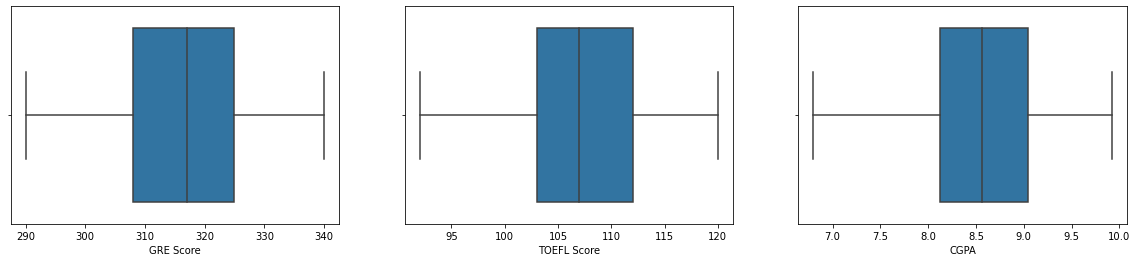

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(20,4))
sns.boxplot(data['GRE Score'],ax=axes[0])
sns.boxplot(data['TOEFL Score'],ax=axes[1])
sns.boxplot(data['CGPA'],ax=axes[2])

## these boxplot conclude 
###        * there is no outlier present in these features 

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

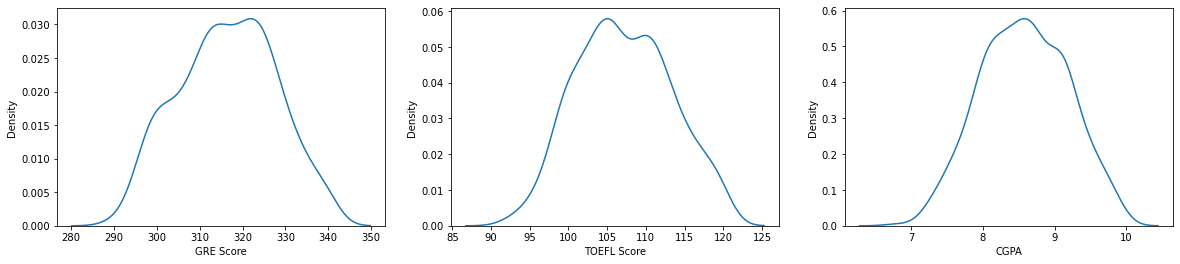

In [206]:
fig,axes=plt.subplots(1,3,figsize=(20,4))
sns.kdeplot(data['GRE Score'],ax=axes[0])
sns.kdeplot(data['TOEFL Score'],ax=axes[1])
sns.kdeplot(data['CGPA'],ax=axes[2])

## this graph shows that
##        * none of the features follows normal distribution

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

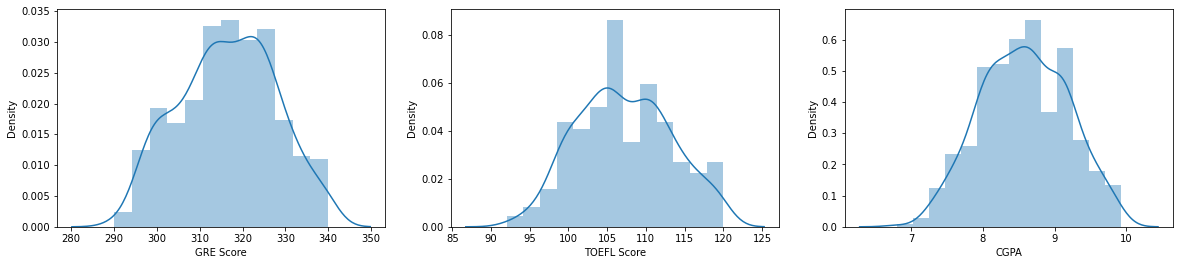

In [207]:
fig,axes=plt.subplots(1,3,figsize=(20,4))
sns.distplot(data['GRE Score'],ax=axes[0])
sns.distplot(data['TOEFL Score'],ax=axes[1])
sns.distplot(data['CGPA'],ax=axes[2])

## this graph shows that
###        * none of the features follows normal distribution

In [208]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:xlabel='LOR ', ylabel='count'>

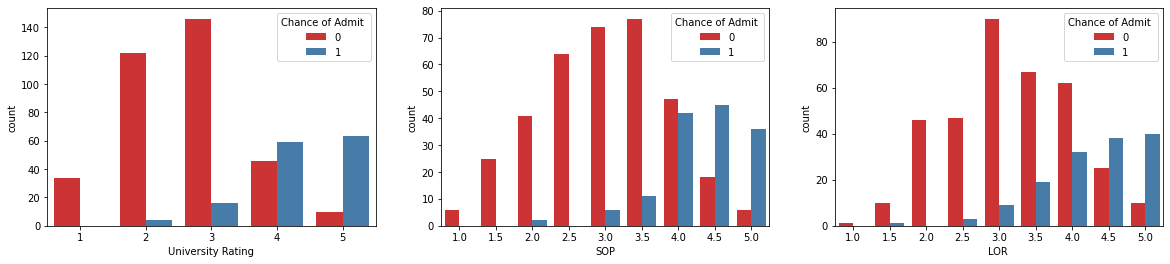

In [213]:
fig, axes = plt.subplots(1,3, figsize=(20,4))
sns.countplot(x='University Rating',data=data,hue='Chance of Admit ',palette='Set1',ax=axes[0])
sns.countplot(x='SOP',data=data,hue='Chance of Admit ',palette='Set1',ax=axes[1])
sns.countplot(x='LOR ',data=data,hue='Chance of Admit ',palette='Set1',ax=axes[2])


## from these graph we conclude
###        * if university rating is high the chance of admit also high
###        * if SOP is high then chance of admit is also high
###        * chance of admit is also high if LOR is high

## multivariate analysis

<AxesSubplot:>

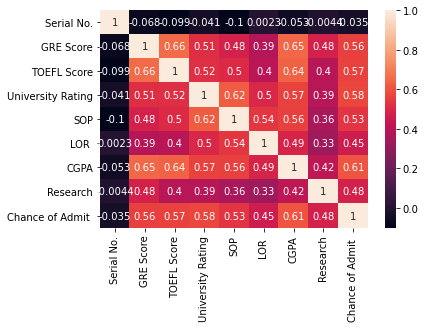

In [218]:
sns.heatmap(data.corr(method='kendall'),annot=True)

###    *in these dataset most of feature are low to medium positive correlated
###     *none of the features is highly correlated

# Perform Exploratory Data Analysis (EDA) tasks

## a) Visualize the 10 random rows of the data set

In [219]:
data.sample(n=10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
309,310,308,110,4,3.5,3.0,8.60,0,0
220,221,313,103,3,4.0,4.0,8.75,0,0
497,498,330,120,5,4.5,5.0,9.56,1,1
120,121,335,117,5,5.0,5.0,9.56,1,1
458,459,312,100,1,3.0,3.0,8.53,1,0
306,307,323,110,3,4.0,3.5,9.10,1,0
122,123,310,106,4,1.5,2.5,8.36,0,0
281,282,317,110,3,4.0,4.5,9.11,1,0
81,82,340,120,4,5.0,5.0,9.50,1,1
108,109,331,116,5,5.0,5.0,9.38,1,1


## b) Generate the description for numeric variables

In [220]:
numeric.describe()

,GRE Score,TOEFL Score,CGPA
count,500.000000,500.000000,500.000000
mean,316.472000,107.192000,8.576440
std,11.295148,6.081868,0.604813
min,290.000000,92.000000,6.800000
25%,308.000000,103.000000,8.127500
50%,317.000000,107.000000,8.560000
75%,325.000000,112.000000,9.040000
max,340.000000,120.000000,9.920000


## c) Check the shape of the data set

In [221]:
data.shape

(500, 9)

## d) Generate the correlation matrix

In [222]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,-0.042374
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.668583
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.684530
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.639878
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.590870
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.512217
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.730938
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.477843
Chance of Admit,-0.042374,0.668583,0.684530,0.639878,0.590870,0.512217,0.730938,0.477843,1.000000


## e) Generate a correlogram

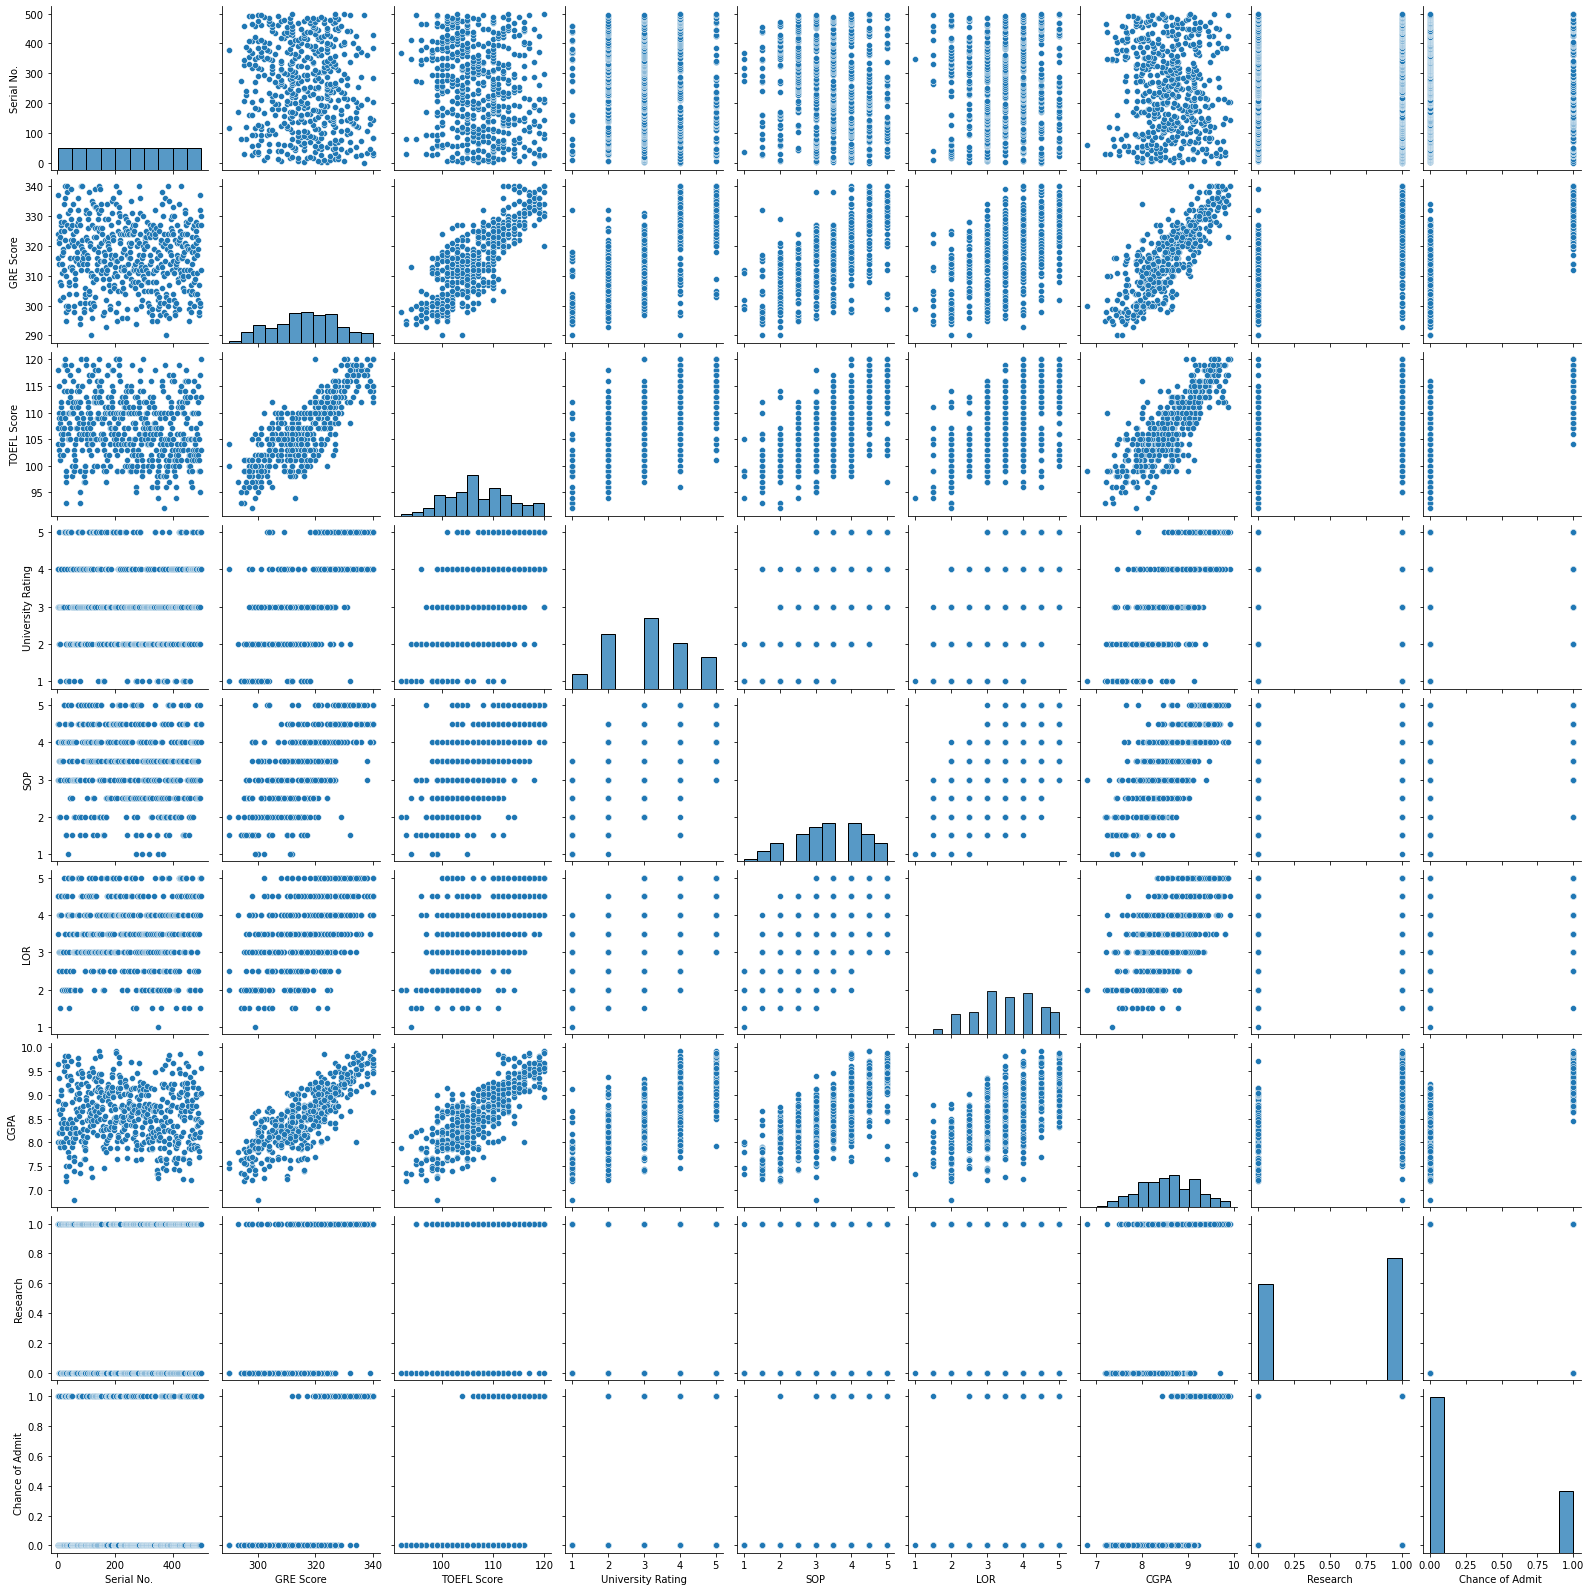

In [223]:
sns.pairplot(data)

# 2 Find out the minimum and maximum values for GRE  score

In [224]:
data.loc[data['GRE Score']==(min(data['GRE Score']))]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
117,118,290,104,4,2.0,2.5,7.46,0,0
377,378,290,100,1,1.5,2.0,7.56,0,0


In [225]:
data.loc[data['GRE Score']==(max(data['GRE Score']))]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,1
33,34,340,114,5,4.0,4.0,9.60,1,1
81,82,340,120,4,5.0,5.0,9.50,1,1
84,85,340,115,5,4.5,4.5,9.45,1,1
143,144,340,120,4,4.5,4.0,9.92,1,1
202,203,340,120,5,4.5,4.5,9.91,1,1
284,285,340,112,4,5.0,4.5,9.66,1,1
384,385,340,113,4,5.0,5.0,9.74,1,1
429,430,340,115,5,5.0,4.5,9.06,1,1


# Find out the percentage of universities for each  university rating

In [226]:
data.groupby(['University Rating'])['Serial No.'].count()/500*100

University Rating
1     6.8
2    25.2
3    32.4
4    21.0
5    14.6
Name: Serial No., dtype: float64

# Convert the target variable “Chance of Admit” to categorical having values 0 and 1

In [227]:
data['Chance of Admit '] = np.where(data['Chance of Admit '].values>0.8,1,0)

In [228]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,0


In [229]:
data['Chance of Admit '].value_counts(normalize=True)*100

0    71.6
1    28.4
Name: Chance of Admit , dtype: float64

# vif

In [230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(numeric.columns)):
    print(f'{numeric.columns[i]}----->{variance_inflation_factor(numeric.values,i)}')

GRE Score----->950.0681342094406
TOEFL Score----->1163.462150773132
CGPA----->637.5350846291406


# logistic regression

In [231]:
x=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']

In [232]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y)

In [233]:
print('ytrain prevelance rate:\n',ytrain.value_counts(normalize=True)*100)

ytrain prevelance rate:
 0    71.714286
1    28.285714
Name: Chance of Admit , dtype: float64


In [234]:
print('ytest prevelance rate:\n',ytest.value_counts(normalize=True)*100)

ytest prevelance rate:
 0    71.333333
1    28.666667
Name: Chance of Admit , dtype: float64


In [235]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain = ss.fit_transform(xtrain)

In [236]:
xtest = ss.transform(xtest)

In [237]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)

LogisticRegression()

In [238]:
ytrain_pred = LR.predict(xtrain)
ytest_pred = LR.predict(xtest)

In [239]:
ytrain_prob = LR.predict_proba(xtrain)
ytest_prob = LR.predict_proba(xtest)

In [240]:
np.argmax(ytest_prob,axis=1)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [241]:
ytest_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

In [242]:
def metrics(a,b):
    cm = confusion_matrix(a,b)
    print('confusion matrix: \n',cm)
    cr = classification_report(a,b)
    print('calssification report: \n',cr)
    score=accuracy_score(a,b)
    print('accuracy score: \n',score)
    

In [243]:
metrics(ytest,ytest_pred)

confusion matrix: 
 [[101   6]
 [  4  39]]
calssification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.87      0.91      0.89        43

    accuracy                           0.93       150
   macro avg       0.91      0.93      0.92       150
weighted avg       0.93      0.93      0.93       150

accuracy score: 
 0.9333333333333333


In [244]:
metrics(ytrain,ytrain_pred)

confusion matrix: 
 [[241  10]
 [ 10  89]]
calssification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       251
           1       0.90      0.90      0.90        99

    accuracy                           0.94       350
   macro avg       0.93      0.93      0.93       350
weighted avg       0.94      0.94      0.94       350

accuracy score: 
 0.9428571428571428


In [245]:
def cross_val(a,b,c,d):
    cv_score = cross_val_score(a,b,c,cv=d)
    print('cross_val_score: \n',cv_score)
    print('cv_mean:',cv_score.mean())
    sns.boxplot(cv_score)

cross_val_score: 
 [0.88571429 0.95714286 0.95714286 0.97142857 0.88571429]
cv_mean: 0.9314285714285715


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


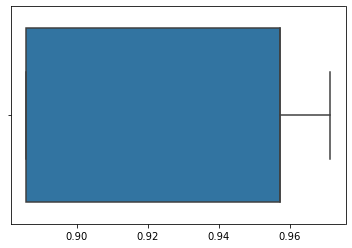

In [246]:
cross_val(LR,xtrain,ytrain,5)

cross_val_score: 
 [0.93333333 0.96666667 0.93333333 0.96666667 0.96666667]
cv_mean: 0.9533333333333334


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


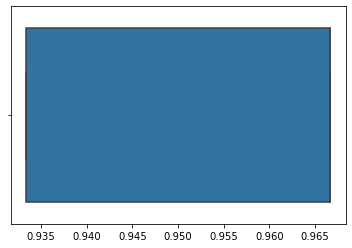

In [247]:
cross_val(LR,xtest,ytest,5)

#  Descision tree

In [248]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=3)
DT.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [249]:
ytrain_pred_dt = DT.predict(xtrain)
ytest_pred_dt = DT.predict(xtest)

In [250]:
metrics(ytest,ytest_pred_dt)

confusion matrix: 
 [[103   4]
 [  6  37]]
calssification report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.90      0.86      0.88        43

    accuracy                           0.93       150
   macro avg       0.92      0.91      0.92       150
weighted avg       0.93      0.93      0.93       150

accuracy score: 
 0.9333333333333333


In [251]:
metrics(ytrain,ytrain_pred_dt)

confusion matrix: 
 [[244   7]
 [ 15  84]]
calssification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       251
           1       0.92      0.85      0.88        99

    accuracy                           0.94       350
   macro avg       0.93      0.91      0.92       350
weighted avg       0.94      0.94      0.94       350

accuracy score: 
 0.9371428571428572


cross_val_score: 
 [0.88571429 0.91428571 0.91428571 0.95714286 0.87142857]
cv_mean: 0.9085714285714286


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


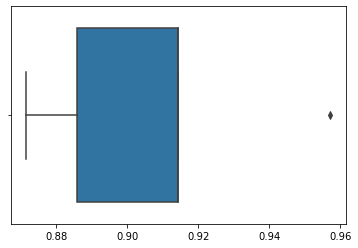

In [252]:
cross_val(DT,xtrain,ytrain,5)

cross_val_score: 
 [0.86666667 0.9        0.86666667 0.93333333 0.96666667]
cv_mean: 0.9066666666666666


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


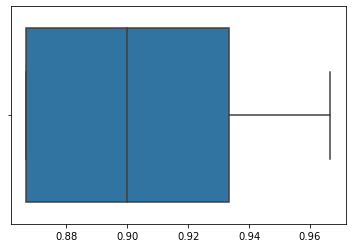

In [253]:
cross_val(DT,xtest,ytest,5)

# Bagging

In [254]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(xtrain,ytrain)

BaggingClassifier()

In [255]:
ytrain_pred_bc =BC.predict(xtrain)
ytest_pred_bc =BC.predict(xtest)

In [256]:
metrics(ytrain,ytrain_pred_bc)

confusion matrix: 
 [[250   1]
 [  3  96]]
calssification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       251
           1       0.99      0.97      0.98        99

    accuracy                           0.99       350
   macro avg       0.99      0.98      0.99       350
weighted avg       0.99      0.99      0.99       350

accuracy score: 
 0.9885714285714285


In [257]:
metrics(ytest,ytest_pred_bc)

confusion matrix: 
 [[103   4]
 [  4  39]]
calssification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.91      0.91      0.91        43

    accuracy                           0.95       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.95      0.95      0.95       150

accuracy score: 
 0.9466666666666667


cross_val_score: 
 [0.92857143 0.91428571 0.94285714 0.92857143 0.87142857]
cv_mean: 0.917142857142857


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


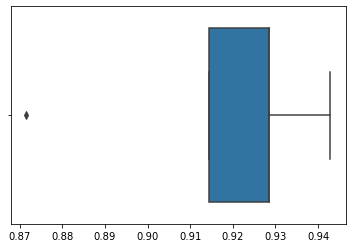

In [48]:
cross_val(BC,xtrain,ytrain,5)

# random forest

In [66]:
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score
cv =ShuffleSplit(n_splits=10,test_size=0.3,random_state=0)
cross_val_score(RF,x,y,cv=cv)

array([0.96666667, 0.92666667, 0.92666667, 0.92666667, 0.92      ,
       0.94666667, 0.95333333, 0.94      , 0.94      , 0.92666667])

In [258]:
from sklearn.ensemble import RandomForestClassifier
RF =RandomForestClassifier()
RF.fit(xtrain,ytrain)

RandomForestClassifier()

In [259]:
ytrain_pred_rf = RF.predict(xtrain)
ytest_pred_rf = RF.predict(xtest)

In [260]:
metrics(ytest,ytest_pred_rf)

confusion matrix: 
 [[102   5]
 [  4  39]]
calssification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       107
           1       0.89      0.91      0.90        43

    accuracy                           0.94       150
   macro avg       0.92      0.93      0.93       150
weighted avg       0.94      0.94      0.94       150

accuracy score: 
 0.94


In [261]:
metrics(ytrain,ytrain_pred_rf)

confusion matrix: 
 [[251   0]
 [  0  99]]
calssification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        99

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350

accuracy score: 
 1.0


cross_val_score: 
 [0.92857143 0.95714286 0.92857143 0.97142857 0.87142857]
cv_mean: 0.9314285714285713


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


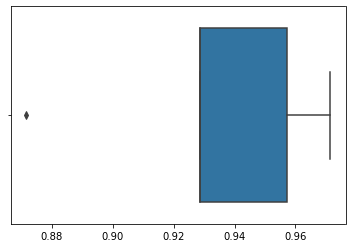

In [262]:
cross_val(RF,xtrain,ytrain,5)

In [263]:
RF.feature_importances_

array([0.053613  , 0.15757744, 0.16534078, 0.12897637, 0.08451409,
       0.04102   , 0.33638499, 0.03257333])

# hyper parameter tuning for random forest

In [264]:
RF = RandomForestClassifier(bootstrap=True,n_estimators = 400, max_depth= 7,max_features= 'auto', criterion = 'entropy', class_weight = 'balanced',random_state=42,min_samples_leaf=4,min_samples_split=5)
RF.fit(xtrain,ytrain)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400, random_state=42)

In [265]:
ytrain_pred_rf = RF.predict(xtrain)
ytest_pred_rf = RF.predict(xtest)

In [266]:
metrics(ytest,ytest_pred_rf)

confusion matrix: 
 [[102   5]
 [  2  41]]
calssification report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       107
           1       0.89      0.95      0.92        43

    accuracy                           0.95       150
   macro avg       0.94      0.95      0.94       150
weighted avg       0.96      0.95      0.95       150

accuracy score: 
 0.9533333333333334


In [267]:
metrics(ytrain,ytrain_pred_rf)

confusion matrix: 
 [[243   8]
 [  5  94]]
calssification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       251
           1       0.92      0.95      0.94        99

    accuracy                           0.96       350
   macro avg       0.95      0.96      0.95       350
weighted avg       0.96      0.96      0.96       350

accuracy score: 
 0.9628571428571429


cross_val_score: 
 [0.9        0.91428571 0.95714286 0.95714286 0.88571429]
cv_mean: 0.9228571428571428


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


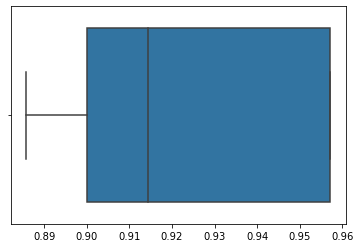

In [86]:
cross_val(RF,xtrain,ytrain,5)

In [155]:
pd.pivottable(index(train,test))

AttributeError: module 'pandas' has no attribute 'pivottable'

# *Logisticregression ---> Train----->  0.94
#                                          Test------>  0.93
# *Dcision Tree----------->Train----->  0.93
#                                       Test------>  0.93
# *Bagging---------------->Train----->  0.97 
#                                      Test------>  0.95
# *Random Forest--------->train----->  0.95
#                                       Test------>  0.96

# conclusion
##           * in these models random forest is the optimal model for this dataset